In [ ]:
!pip install catboost


In [ ]:
!pip install optuna

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c GiveMeSomeCredit

  0% 0.00/5.16M [00:00<?, ?B/s]
100% 5.16M/5.16M [00:00<00:00, 669MB/s]


In [ ]:
!unzip GiveMeSomeCredit.zip

Archive:  GiveMeSomeCredit.zip
  inflating: Data Dictionary.xls     
  inflating: cs-test.csv             
  inflating: cs-training.csv         
  inflating: sampleEntry.csv         


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('cs-training.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [ ]:
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [ ]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
df.tail()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
149999,150000,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,29731
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0


In [ ]:
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)


/tmp/ipython-input-2409291329.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)


In [ ]:
df['MonthlyIncome'] = pd.to_numeric(df['MonthlyIncome'], errors='coerce')

In [ ]:
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())

In [ ]:
df['NumberOfDependents'] = df['NumberOfDependents'].fillna(df['NumberOfDependents'].mode()[0])

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,0
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0


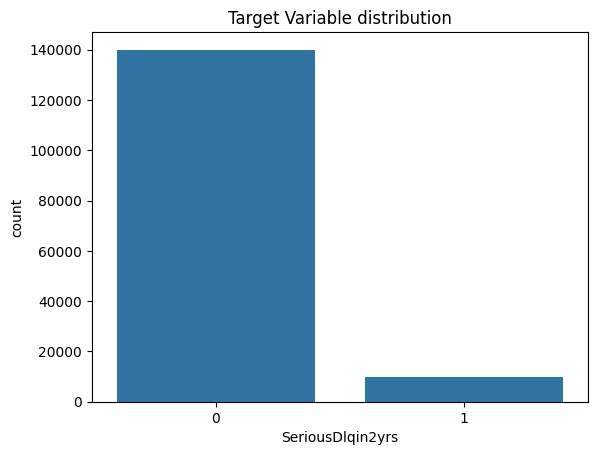

In [ ]:
sns.countplot(x= 'SeriousDlqin2yrs', data = df)
plt.title('Target Variable distribution')
plt.show()

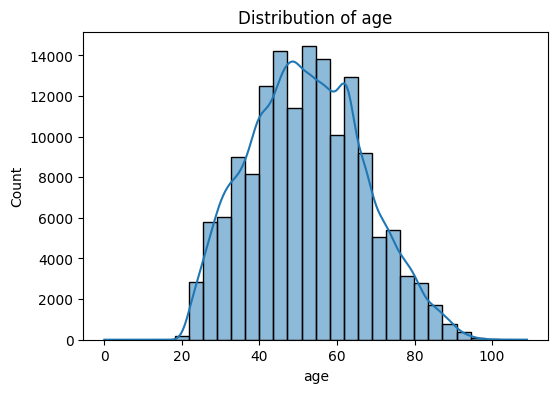

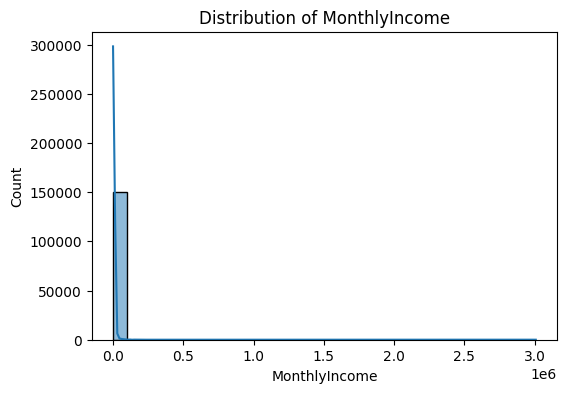

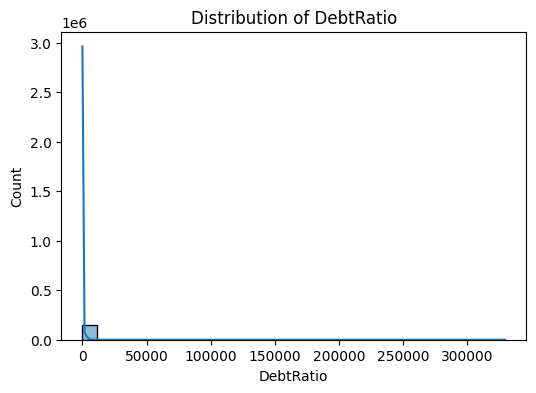

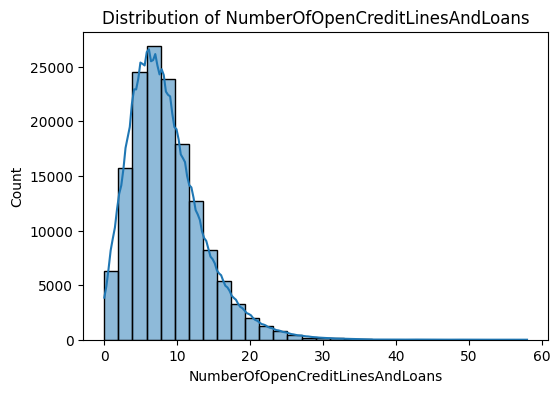

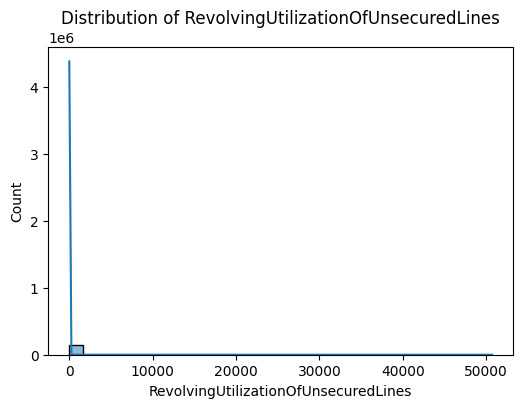

In [ ]:
num_cols = ['age', 'MonthlyIncome', 'DebtRatio',
            'NumberOfOpenCreditLinesAndLoans',
            'RevolvingUtilizationOfUnsecuredLines']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

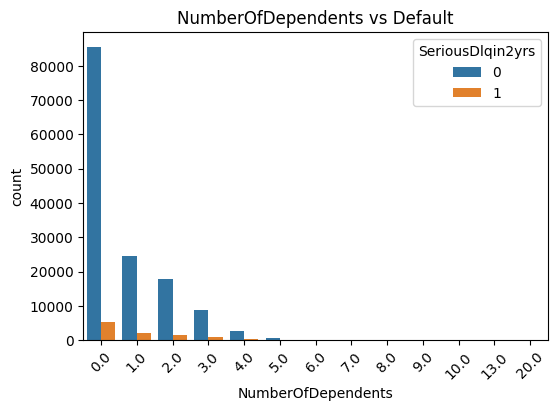

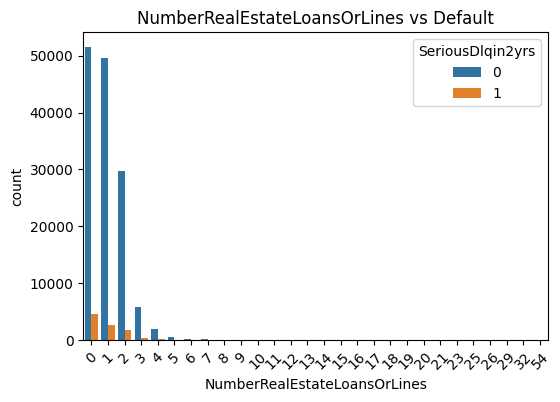

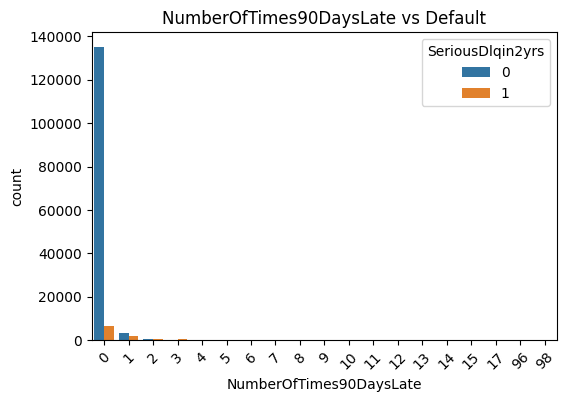

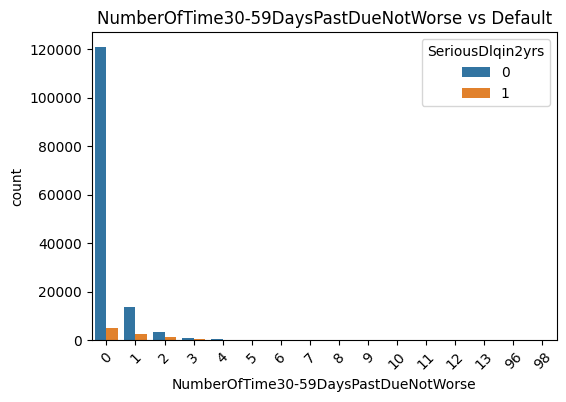

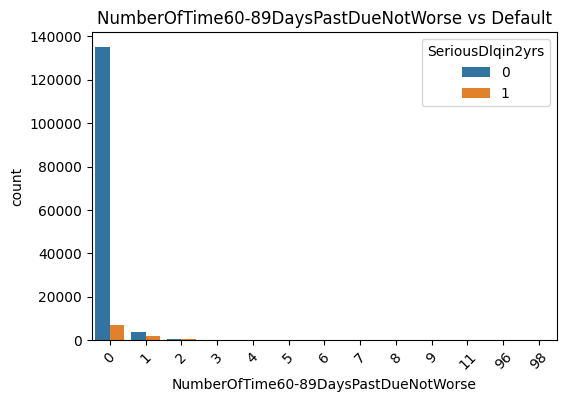

In [ ]:
cat_cols = ['NumberOfDependents', 'NumberRealEstateLoansOrLines',
            'NumberOfTimes90DaysLate',
            'NumberOfTime30-59DaysPastDueNotWorse',
            'NumberOfTime60-89DaysPastDueNotWorse']

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='SeriousDlqin2yrs', data=df)
    plt.title(f"{col} vs Default")
    plt.xticks(rotation=45)
    plt.show()

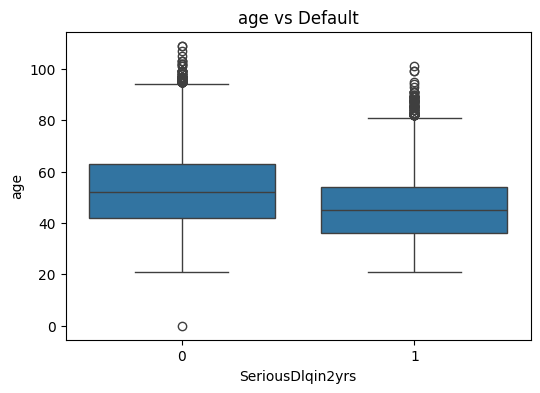

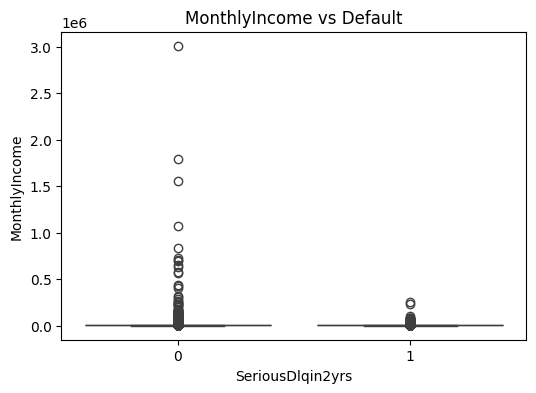

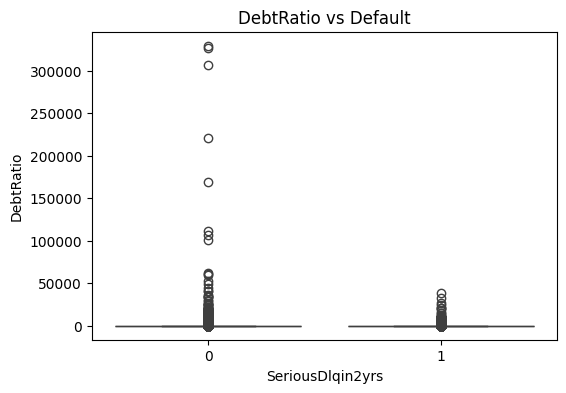

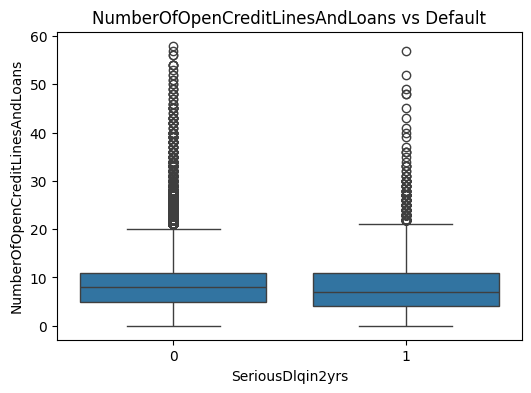

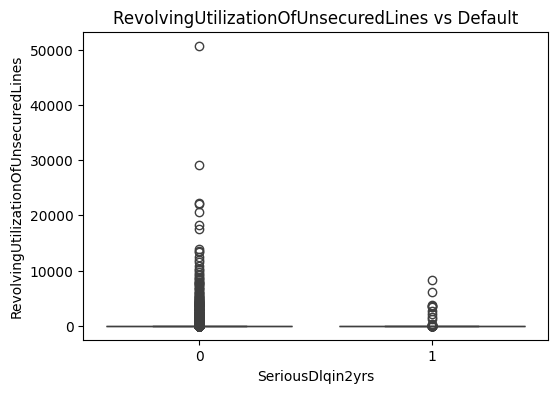

In [ ]:
num_cols = ['age', 'MonthlyIncome', 'DebtRatio',
            'NumberOfOpenCreditLinesAndLoans',
            'RevolvingUtilizationOfUnsecuredLines']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='SeriousDlqin2yrs', y=col, data=df)
    plt.title(f"{col} vs Default")
    plt.show()

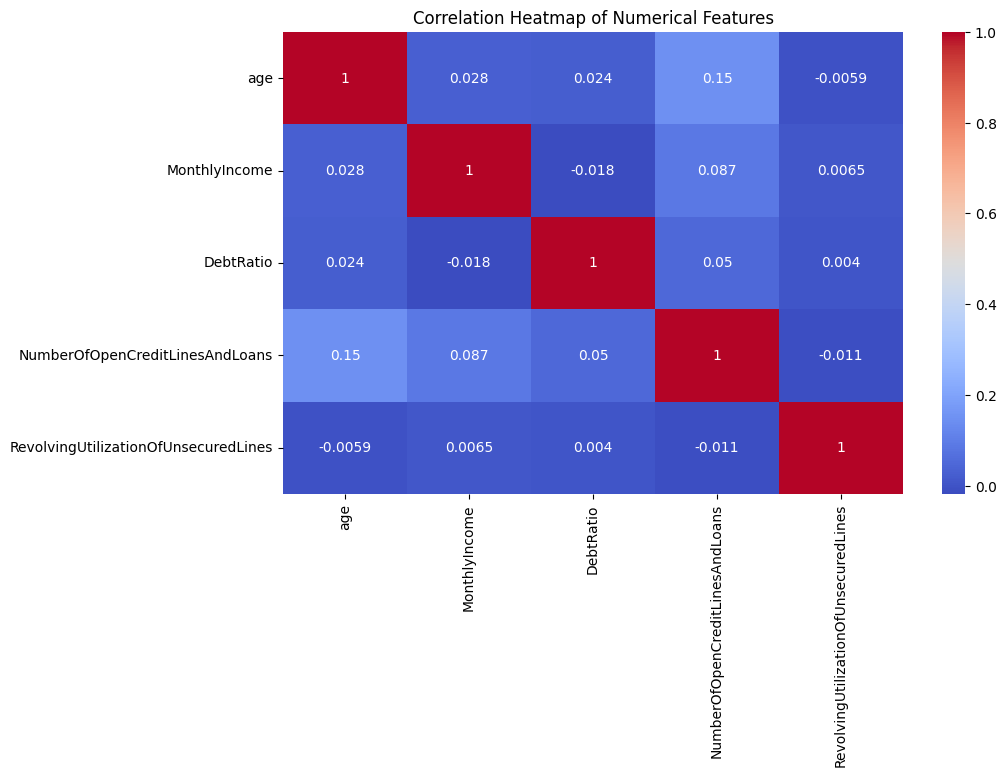

In [ ]:
plt.figure(figsize=(10,6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


/tmp/ipython-input-4248191195.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue="SeriousDlqin2yrs", shade=True)


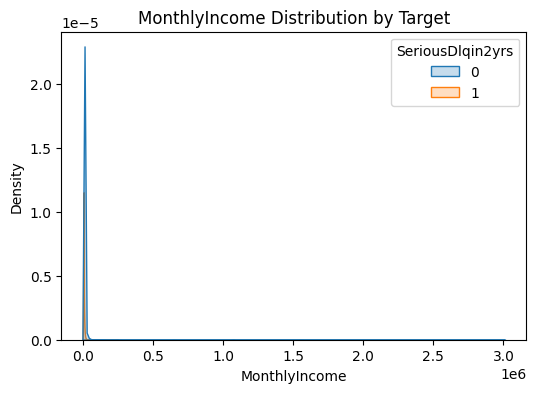

/tmp/ipython-input-4248191195.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue="SeriousDlqin2yrs", shade=True)


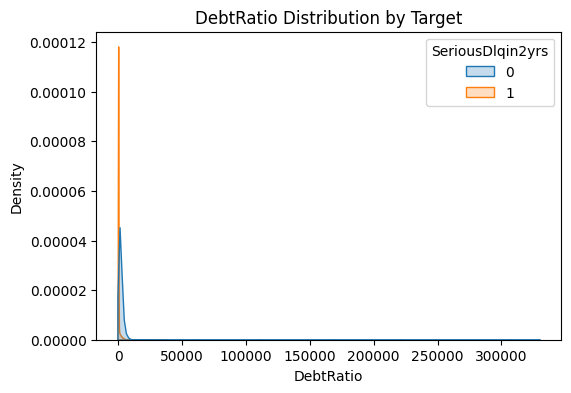

/tmp/ipython-input-4248191195.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue="SeriousDlqin2yrs", shade=True)


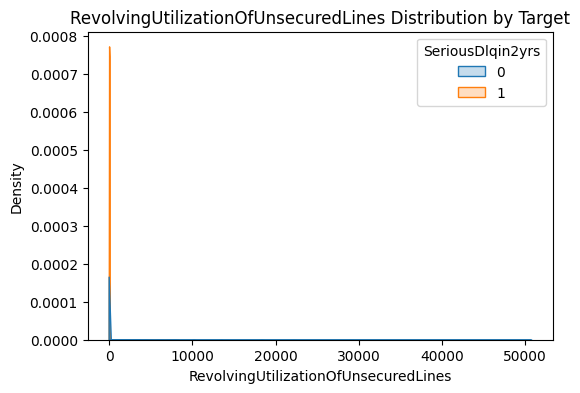

In [ ]:
for col in ['MonthlyIncome', 'DebtRatio', 'RevolvingUtilizationOfUnsecuredLines']:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=col, hue="SeriousDlqin2yrs", shade=True)
    plt.title(f"{col} Distribution by Target")
    plt.show()


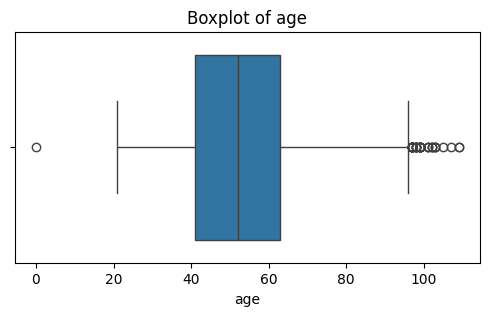

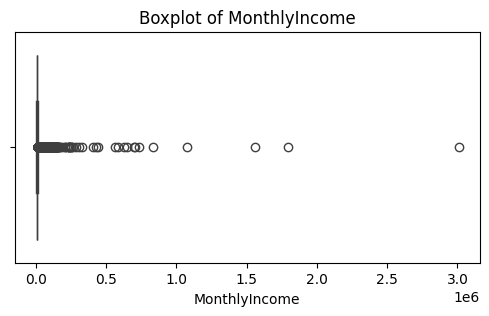

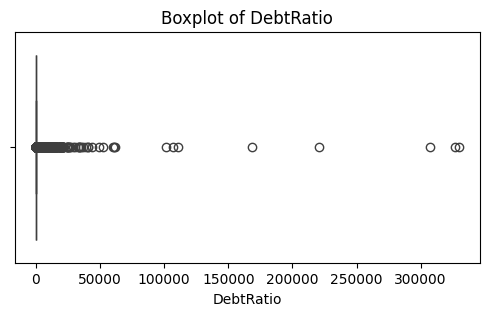

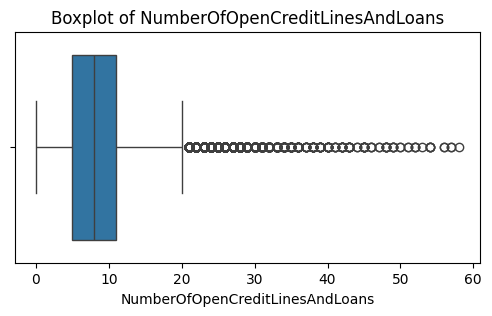

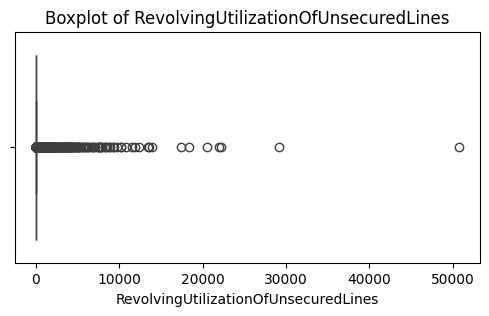

In [ ]:
num_cols = ['age', 'MonthlyIncome', 'DebtRatio',
            'NumberOfOpenCreditLinesAndLoans',
            'RevolvingUtilizationOfUnsecuredLines']

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)]

In [ ]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

for col in num_cols:
    df = remove_outliers(df, col)

print("✅ Outliers removed. New shape:", df.shape)

✅ Outliers removed. New shape: (106892, 12)


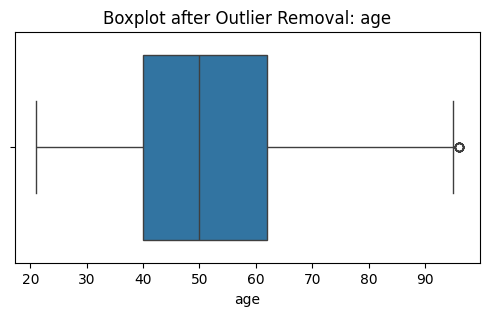

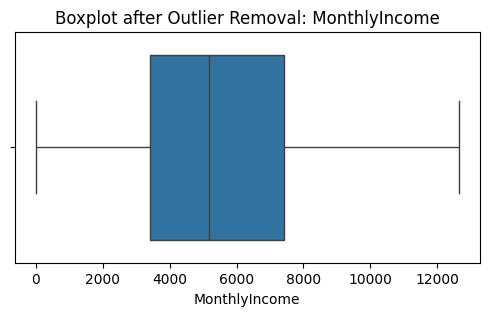

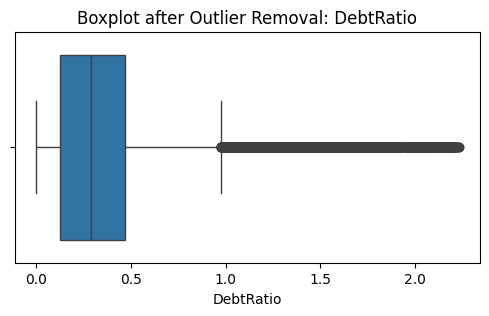

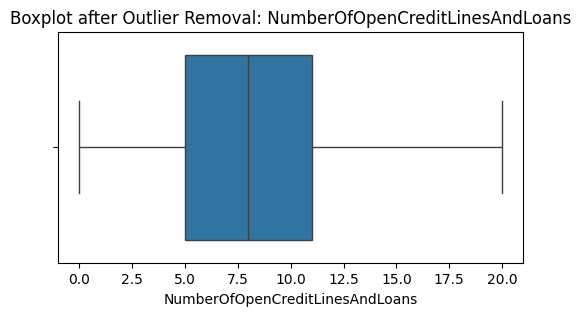

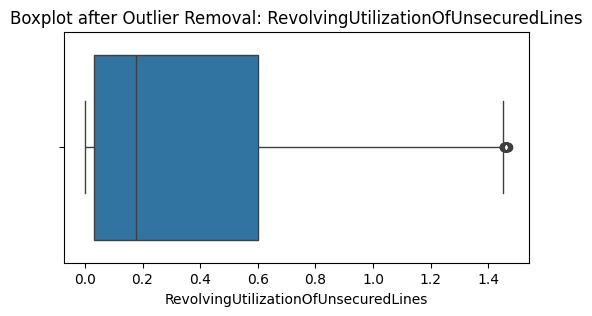

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot after Outlier Removal: {col}')
    plt.show()

In [ ]:
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (85513, 11) Test shape: (21379, 11)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import pandas as pd

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
print(X_train_scaled.describe().T[['mean','std']])

                                              mean       std
Unnamed: 0                           -1.204831e-16  1.000006
RevolvingUtilizationOfUnsecuredLines -1.181565e-16  1.000006
age                                  -1.377246e-16  1.000006
NumberOfTime30-59DaysPastDueNotWorse -1.539275e-17  1.000006
DebtRatio                             5.114299e-17  1.000006
MonthlyIncome                        -2.393043e-17  1.000006
NumberOfOpenCreditLinesAndLoans      -1.105536e-16  1.000006
NumberOfTimes90DaysLate               3.340290e-17  1.000006
NumberRealEstateLoansOrLines          3.739130e-17  1.000006
NumberOfTime60-89DaysPastDueNotWorse -2.658937e-17  1.000006
NumberOfDependents                   -4.403864e-17  1.000006


In [ ]:
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Train model
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:,1]

In [ ]:
accuracy_score(y_test, y_pred)

0.7317928808643996

In [ ]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.97      0.73      0.84     19866\n           1       0.17      0.70      0.27      1513\n\n    accuracy                           0.73     21379\n   macro avg       0.57      0.72      0.55     21379\nweighted avg       0.91      0.73      0.80     21379\n'

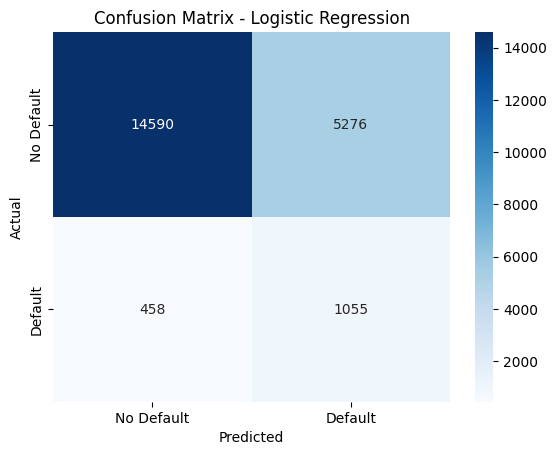

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Default","Default"], yticklabels=["No Default","Default"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
auc = roc_auc_score(y_test, y_prob)
print(auc)

0.7924811371682672


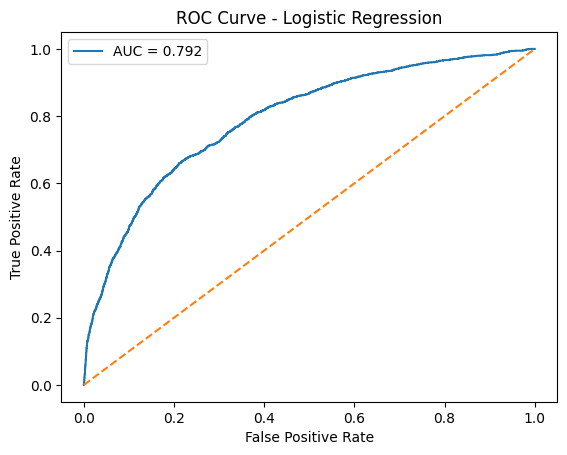

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)
y_pred_rf_proba = rf.predict_proba(X_test)[:,1]

In [ ]:
confusion_matrix(y_test, y_pred_rf)

array([[19640,   226],
       [ 1255,   258]])

In [ ]:
classification_report(y_test, y_pred_rf)

'              precision    recall  f1-score   support\n\n           0       0.94      0.99      0.96     19866\n           1       0.53      0.17      0.26      1513\n\n    accuracy                           0.93     21379\n   macro avg       0.74      0.58      0.61     21379\nweighted avg       0.91      0.93      0.91     21379\n'

In [ ]:
roc_auc_score(y_test, y_pred_rf_proba)

np.float64(0.8324537953528561)

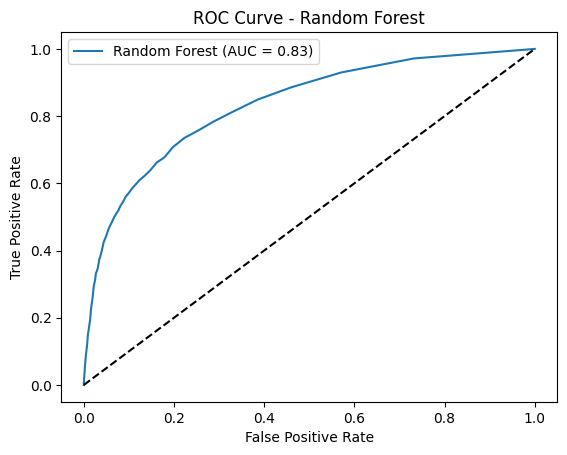

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_proba)
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_pred_rf_proba):.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

In [ ]:
importances = rf.feature_importances_
features = X_train.columns

In [ ]:
feat_importances = pd.DataFrame({"Feature": features, "Importance": importances})
feat_importances = feat_importances.sort_values(by="Importance", ascending=False)

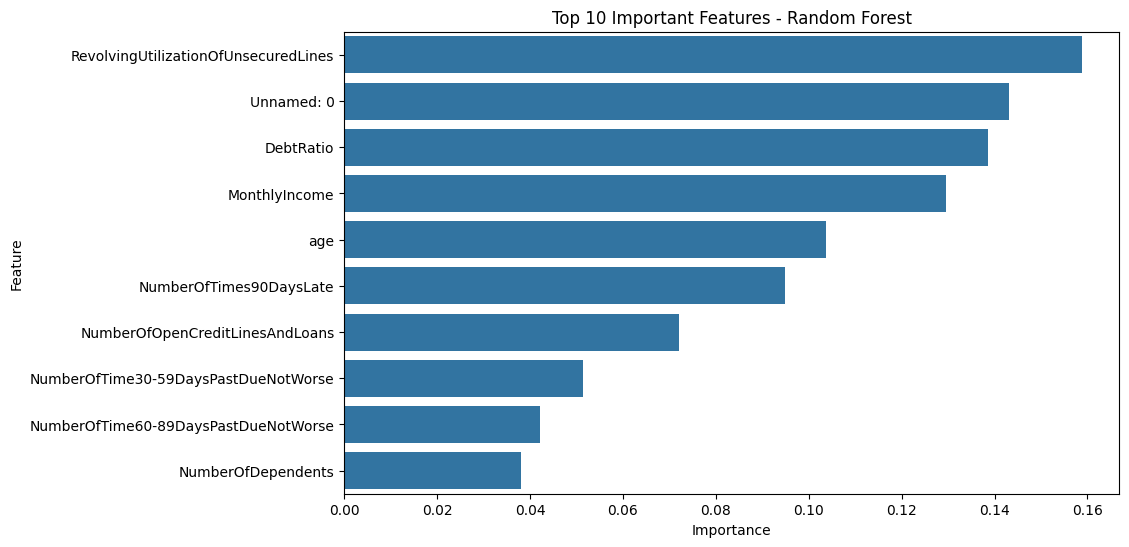

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_importances.head(10))
plt.title("Top 10 Important Features - Random Forest")
plt.show()

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

In [ ]:
xgb.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:49:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)[:,1]

In [ ]:
accuracy_score(y_test, y_pred)

0.9326909584171383

In [ ]:
roc_auc_score(y_test, y_pred_proba)

np.float64(0.8514389769020182)

In [ ]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.94      0.99      0.96     19866\n           1       0.57      0.20      0.30      1513\n\n    accuracy                           0.93     21379\n   macro avg       0.76      0.60      0.63     21379\nweighted avg       0.92      0.93      0.92     21379\n'

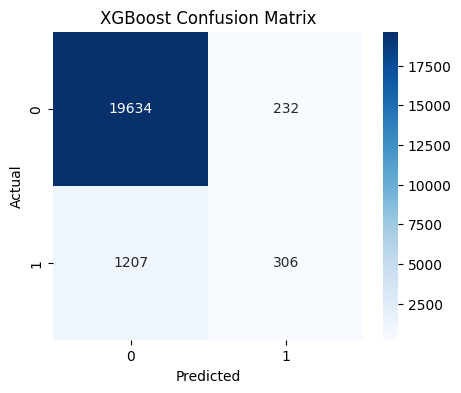

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from xgboost import plot_importance

<Figure size 1000x600 with 0 Axes>

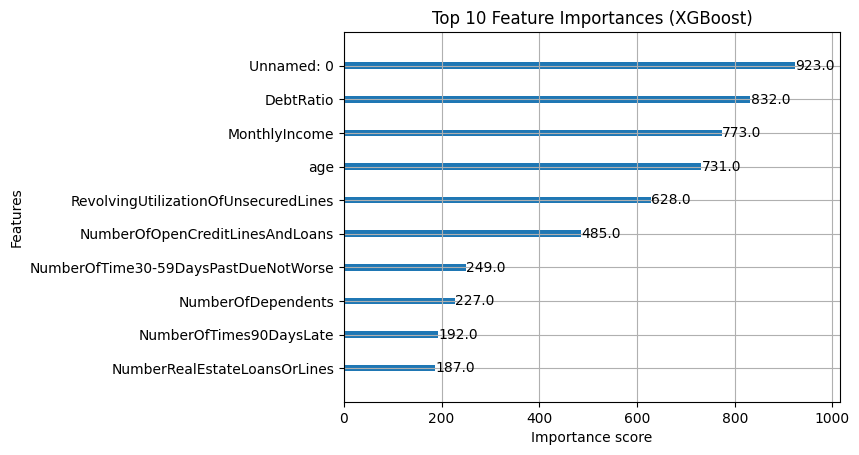

In [ ]:
plt.figure(figsize=(10, 6))
plot_importance(xgb, max_num_features=10, importance_type='weight')
plt.title("Top 10 Feature Importances (XGBoost)")
plt.show()

<Figure size 1000x600 with 0 Axes>

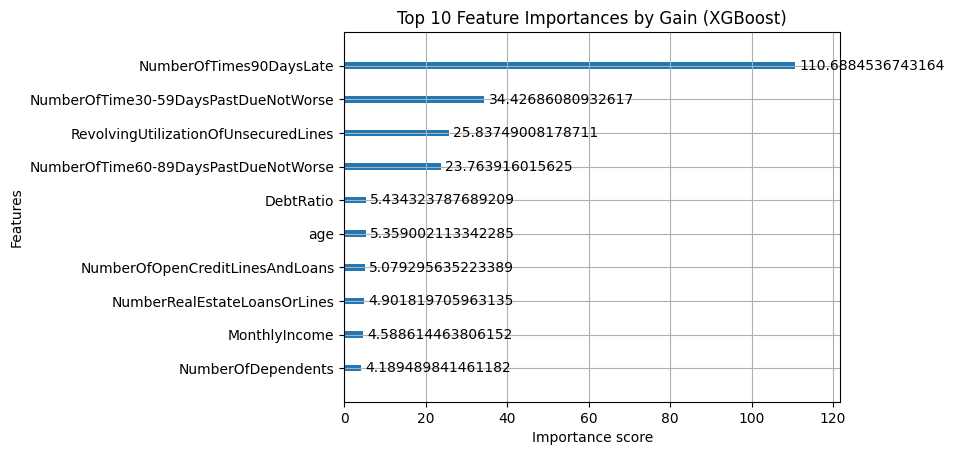

In [ ]:
plt.figure(figsize=(10, 6))
plot_importance(xgb, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importances by Gain (XGBoost)")
plt.show()

In [ ]:
log_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(log_reg.coef_[0])   # absolute coefficients
}).sort_values(by='Importance', ascending=False)

print(log_importance.head(10))

                                 Feature  Importance
1   RevolvingUtilizationOfUnsecuredLines    2.156578
4                              DebtRatio    0.337064
3   NumberOfTime30-59DaysPastDueNotWorse    0.336608
9   NumberOfTime60-89DaysPastDueNotWorse    0.329944
7                NumberOfTimes90DaysLate    0.212638
6        NumberOfOpenCreditLinesAndLoans    0.032701
10                    NumberOfDependents    0.032048
2                                    age    0.026066
8           NumberRealEstateLoansOrLines    0.009902
5                          MonthlyIncome    0.000085


In [ ]:
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(rf_importance.head(10))

                                 Feature  Importance
1   RevolvingUtilizationOfUnsecuredLines    0.158889
0                             Unnamed: 0    0.143209
4                              DebtRatio    0.138532
5                          MonthlyIncome    0.129542
2                                    age    0.103754
7                NumberOfTimes90DaysLate    0.094957
6        NumberOfOpenCreditLinesAndLoans    0.072031
3   NumberOfTime30-59DaysPastDueNotWorse    0.051407
9   NumberOfTime60-89DaysPastDueNotWorse    0.042202
10                    NumberOfDependents    0.038176


In [ ]:
xgb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(xgb_importance.head(10))

                                 Feature  Importance
7                NumberOfTimes90DaysLate    0.484812
3   NumberOfTime30-59DaysPastDueNotWorse    0.150789
1   RevolvingUtilizationOfUnsecuredLines    0.113167
9   NumberOfTime60-89DaysPastDueNotWorse    0.104085
4                              DebtRatio    0.023802
2                                    age    0.023472
6        NumberOfOpenCreditLinesAndLoans    0.022247
8           NumberRealEstateLoansOrLines    0.021470
5                          MonthlyIncome    0.020098
10                    NumberOfDependents    0.018350


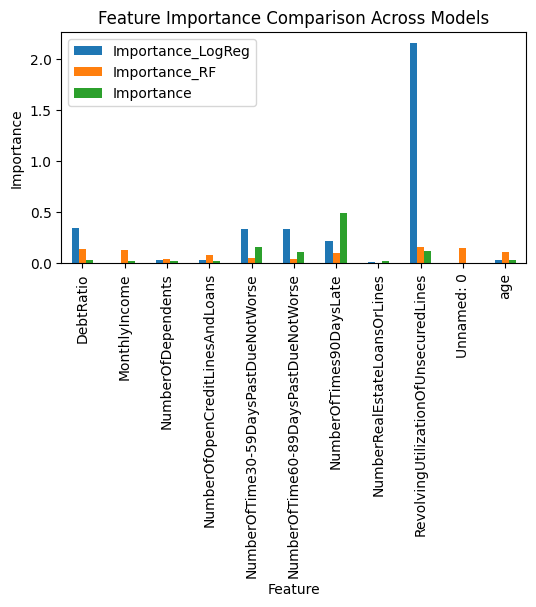

In [ ]:
import matplotlib.pyplot as plt

# Combine top 10 features of each
log_top = log_importance.head(10).set_index('Feature')
rf_top = rf_importance.head(10).set_index('Feature')
xgb_top = xgb_importance.head(10).set_index('Feature')

# Merge all
combined = log_top.join(rf_top, lsuffix='_LogReg', rsuffix='_RF', how='outer')
combined = combined.join(xgb_top, rsuffix='_XGB', how='outer')
combined = combined.fillna(0)

# Plot
combined.plot(kind='bar', figsize=(6,3))
plt.title("Feature Importance Comparison Across Models")
plt.ylabel("Importance")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
    "ROC-AUC": []
}

In [ ]:
# Logistic Regression Prediction
y_pred_logreg = log_reg.predict(X_test)

# Random Forest Prediction
y_pred_rf = rf.predict(X_test)

# XGBoost Prediction
y_pred_xgb = xgb.predict(X_test)

In [ ]:
# Logistic Regression
results["Model"].append("Logistic Regression")
results["Accuracy"].append(accuracy_score(y_test, y_pred_logreg))
results["Precision"].append(precision_score(y_test, y_pred_logreg))
results["Recall"].append(recall_score(y_test, y_pred_logreg))
results["F1 Score"].append(f1_score(y_test, y_pred_logreg))
results["ROC-AUC"].append(roc_auc_score(y_test, y_pred_logreg))

# Random Forest
results["Model"].append("Random Forest")
results["Accuracy"].append(accuracy_score(y_test, y_pred_rf))
results["Precision"].append(precision_score(y_test, y_pred_rf))
results["Recall"].append(recall_score(y_test, y_pred_rf))
results["F1 Score"].append(f1_score(y_test, y_pred_rf))
results["ROC-AUC"].append(roc_auc_score(y_test, y_pred_rf))

# XGBoost
results["Model"].append("XGBoost")
results["Accuracy"].append(accuracy_score(y_test, y_pred_xgb))
results["Precision"].append(precision_score(y_test, y_pred_xgb))
results["Recall"].append(recall_score(y_test, y_pred_xgb))
results["F1 Score"].append(f1_score(y_test, y_pred_xgb))
results["ROC-AUC"].append(roc_auc_score(y_test, y_pred_xgb))


In [ ]:
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Logistic Regression  0.731793   0.166640  0.697290  0.268995  0.715855
1        Random Forest  0.930726   0.533058  0.170522  0.258388  0.579573
2              XGBoost  0.932691   0.568773  0.202247  0.298391  0.595284


In [ ]:
results = []

# Logistic Regression
results.append({
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred_logreg),
    "Precision": precision_score(y_test, y_pred_logreg),
    "Recall": recall_score(y_test, y_pred_logreg)
})

# Random Forest
results.append({
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf)
})

# XGBoost
results.append({
    "Model": "XGBoost",
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb),
    "Recall": recall_score(y_test, y_pred_xgb)
})

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall
0  Logistic Regression  0.731793   0.166640  0.697290
1        Random Forest  0.930726   0.533058  0.170522
2              XGBoost  0.932691   0.568773  0.202247


In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(xgb, X_test)
shap_values = explainer(X_test)

 99%|===================| 21238/21379 [02:40<00:01]       

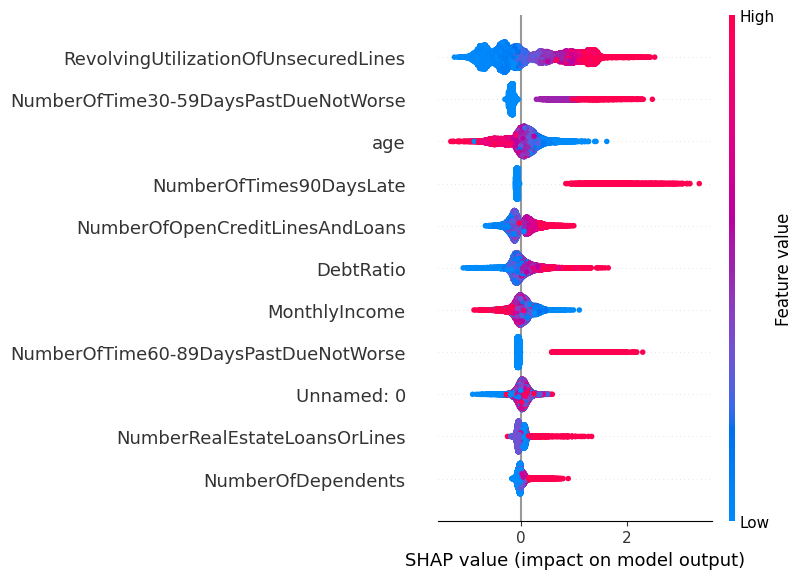

In [ ]:
shap.summary_plot(shap_values, X_test)

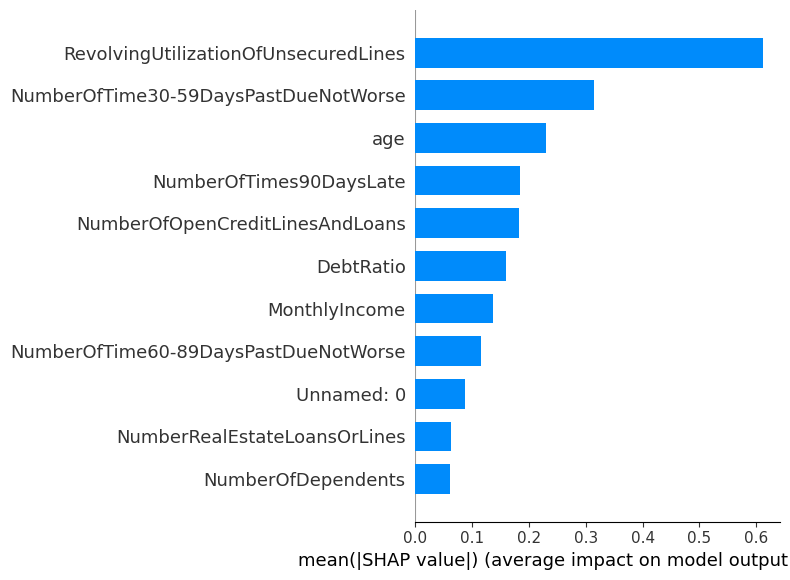

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

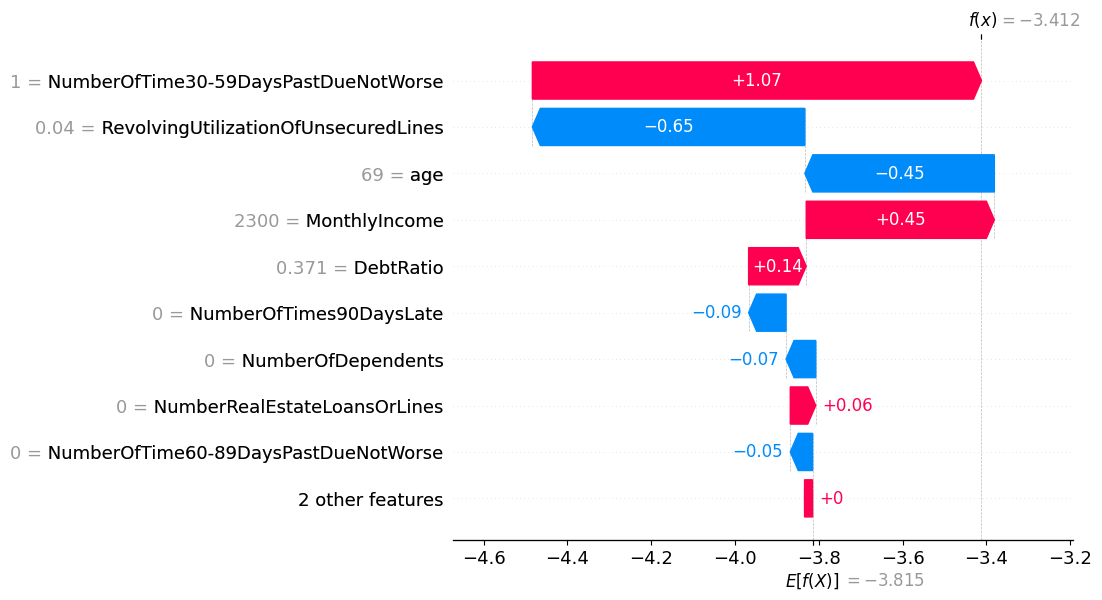

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
import pickle


In [ ]:
# Model save
with open("xgb_credit_model.pkl", "wb") as f:
    pickle.dump(xgb, f)

# Model load
with open("xgb_credit_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Test
print("Loaded Model Predictions:", loaded_model.predict(X_test[:5]))

Loaded Model Predictions: [0 0 0 0 0]


In [ ]:
!pip install streamlit

In [ ]:
import streamlit as st
import pickle
import numpy as np

# Load model
with open("xgb_credit_model.pkl", "rb") as f:
    model = pickle.load(f)

st.title("💳 Credit Default Prediction App")

st.write("Enter details to predict whether a person will default or not:")

# Example Inputs
RevolvingUtilization = st.number_input("RevolvingUtilizationOfUnsecuredLines", min_value=0.0, max_value=10.0, step=0.01)
age = st.number_input("Age", min_value=18, max_value=100, step=1)
DebtRatio = st.number_input("Debt Ratio", min_value=0.0, max_value=10.0, step=0.01)
MonthlyIncome = st.number_input("Monthly Income", min_value=0, max_value=100000, step=100)

# Convert to numpy array (dummy shape for model)
features = np.array([[RevolvingUtilization, age, DebtRatio, MonthlyIncome]])

if st.button("Predict"):
    pred = model.predict(features)
    if pred[0] == 1:
        st.error("⚠️ High Risk: Likely to Default")
    else:
        st.success("✅ Low Risk: Unlikely to Default")


2025-08-26 00:54:03.243 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-26 00:54:03.487 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-08-26 00:54:03.488 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-26 00:54:03.489 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-26 00:54:03.490 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-26 00:54:03.491 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-26 00:54:03.492 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-26 00:54:03.493 Thread 'MainThread': mi